#　在 Jupyter (IPython) 中用 Julia

## 1. 準備工作
Julia 是一個完全「現代」的語言, 試圖要做一個和 Python 一樣簡單使用、全功能, 但要和 C 一樣快 (!) 的程式語言。

###(1) 安裝 Julia
請去[Julia 官網](http://julialang.org/)下載安裝, 這一步很容易。

###(2) 安裝 IJulia
這個 IJulia 其實是在 Jupyter (IPython) 這個介面下直接用 Julia。在 IPython 3.0 後, 建新的 notebook 我們可以不一定選 Python, 也可選 Julia。

安裝只要在 Julia 中, 安裝:

    Pkg.add("IJulia")

###(3) 安裝 PyCall
再來還是在 Julia 中安裝呼叫 Python 的套件, 於是再安裝:

    Pkg.add("PyCall")
    
###(4) 安裝 Python 的 pyjulia 套件
這個在我安裝時最麻煩, 要去 [pyjulia 的 GitHub](https://github.com/JuliaLang/pyjulia) 網中, 把整個 clone 或是就下載 zip 壓縮檔。然後在終端機中下達我個人很久沒有用這的

    python setup.py install
    
(這其實是 Python 最「標準」、最原始安裝套件法)

## 2. 終於可以在 IPython 用 Julia 了

和 R 一樣, Julia 也有 %%julia 包整個 cell, %julia 包一行這樣的用法。

In [1]:
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


不過, print 好像有問題...

In [2]:
%%julia

println("Hi from Julia!")

算個東西反而可以。

In [3]:
%%julia

2+3
a = [1:5]
a

array([1, 2, 3, 4, 5], dtype=int64)

##3. 傳資料給 Python

現在 Python 果然還是不認得 a。

In [4]:
a

NameError: name 'a' is not defined

結果這樣就可以了!

In [5]:
a = %julia a

In [6]:
a

array([1, 2, 3, 4, 5], dtype=int64)

##4. 更炫的傳函數

Julia 可以這樣定函數本身就是很炫的事。

In [7]:
%%julia

f(x) = x^2

<PyCall.jlwrap f>

In [8]:
%julia f(3)

9

然後, 我們居然可以...

In [9]:
g = %julia g(x) = sin(x) + 0.5*x

In [10]:
g(3)

1.6411200080598671

這樣就傳給 Python 了!! 順變畫個圖好了。

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
x = linspace(0,10,100)

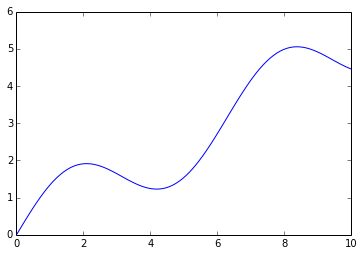

In [13]:
plot(x, g(x));

##5. 直接執行 Julia 指令!

In [14]:
import julia

In [15]:
j = julia.Julia()

In [16]:
j.eval('sin(1)')

0.8414709848078965

In [17]:
arr = j.eval('1:10')

In [18]:
arr

range(1, 11)